# Lab 11 - Logistic Regression
## Lecture 11

In [27]:
dset = iris[,c('Species','Sepal.Length','Sepal.Width')]
dset = dset[dset$Species %in% c("virginica","versicolor"),]

In [28]:
table(dset$Species)


    setosa versicolor  virginica 
         0         50         50 

In [29]:
levels(dset$Species) = c(NA,"versicolor","virginica")
dset$Species = relevel(dset$Species,ref="versicolor")
table(dset$Species)


versicolor  virginica 
        50         50 

In [33]:
head(dset$Species)
head(as.numeric(dset$Species))

[1] versicolor versicolor versicolor versicolor versicolor versicolor
Levels: versicolor virginica

[1] 1 1 1 1 1 1

In [5]:
?glm

glm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
family,"a description of the error distribution and link function to be used in the model. For glm this can be a character string naming a family function, a family function or the result of a call to a family function. For glm.fit only the third option is supported. (See family for details of family functions.)"
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which glm is called."
weights,an optional vector of ‘prior weights’ to be used in the fitting process. Should be NULL or a numeric vector.
subset,an optional vector specifying a subset of observations to be used in the fitting process.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
start,starting values for the parameters in the linear predictor.
etastart,starting values for the linear predictor.
mustart,starting values for the vector of means.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector of length equal to the number of cases. One or more offset terms can be included in the formula instead or as well, and if more than one is specified their sum is used. See model.offset."


In [6]:
log_mod = glm(formula=Species~.,data=dset,family="binomial")
summary(log_mod)


Call:
glm(formula = Species ~ ., family = "binomial", data = dset)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.87365  -0.89513  -0.05501   0.96084   2.35669  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -13.0460     3.0974  -4.212 2.53e-05 ***
Sepal.Length   1.9024     0.5169   3.680 0.000233 ***
Sepal.Width    0.4047     0.8628   0.469 0.639077    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.63  on 99  degrees of freedom
Residual deviance: 110.33  on 97  degrees of freedom
AIC: 116.33

Number of Fisher Scoring iterations: 4


$p = logistic(X\beta) \leftrightarrow logit(p) = log(p/(1-p)) = X\beta$

In [8]:
head(predict(log_mod))## predicts the log-odds = logit(p)

51         52         53         54         55         56 
 1.5655070  0.4240819  1.3348035 -1.6522493  0.4524556 -1.0694446

In [18]:
X_design = model.matrix(log_mod)
head(X_design)

,(Intercept),Sepal.Length,Sepal.Width
51,1,7.0,3.2
52,1,6.4,3.2
53,1,6.9,3.1
54,1,5.5,2.3
55,1,6.5,2.8
56,1,5.7,2.8


In [17]:
beta_hat = log_mod$coefficients
beta_hat = array(beta_hat,c(3,1))
beta_hat

-13.0460297
1.9023752
0.4046594


In [20]:
head(X_design%*%beta_hat)

51,1.5655070
52,0.4240819
53,1.3348035
54,-1.6522493
55,0.4524556
56,-1.0694446


In [21]:
p_hats = predict(log_mod,type="response")
head(p_hats)

51        52        53        54        55        56 
0.8271422 0.6044596 0.7916341 0.1608052 0.6112229 0.2555087

In [22]:
head(predict(log_mod))
head(log(p_hats/(1-p_hats)))

51         52         53         54         55         56 
 1.5655070  0.4240819  1.3348035 -1.6522493  0.4524556 -1.0694446

51         52         53         54         55         56 
 1.5655070  0.4240819  1.3348035 -1.6522493  0.4524556 -1.0694446

In [24]:
train_pred = as.numeric(p_hats > .5)
head(train_pred)

[1] 1 1 1 0 1 0

In [34]:
train_pred = factor(train_pred,labels=c('versicolor','virginica'))
head(train_pred)

[1] virginica  virginica  virginica  versicolor virginica  versicolor
Levels: versicolor virginica

In [35]:
library('caret')
confusionMatrix(data=train_pred,reference=dset$Species)

Loading required package: lattice

Loading required package: ggplot2



Confusion Matrix and Statistics

            Reference
Prediction   versicolor virginica
  versicolor         38        13
  virginica          12        37
                                          
               Accuracy : 0.75            
                 95% CI : (0.6534, 0.8312)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 2.818e-07       
                                          
                  Kappa : 0.5             
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7600          
            Specificity : 0.7400          
         Pos Pred Value : 0.7451          
         Neg Pred Value : 0.7551          
             Prevalence : 0.5000          
         Detection Rate : 0.3800          
   Detection Prevalence : 0.5100          
      Balanced Accuracy : 0.7500          
                                          
       'Positive' Class : 

In [38]:
plot_mod = function(mod){
    x1r = range(dset$Sepal.Length)
    x2r = range(dset$Sepal.Width)
    x1s = seq(x1r[1],x1r[2],.01)
    x2s = seq(x2r[1],x2r[2],.01)
    grd = expand.grid(x1s,x2s)
    colnames(grd) = c('Sepal.Length','Sepal.Width')
    p_hats = predict(mod,newdata=grd,type='response')
    train_pred = (p_hats>.5)*1
    grd_pred = factor(train_pred,labels=c('versicolor','virginica'))
    grd_df = cbind(grd,grd_pred)
    colnames(grd_df) = c('Sepal.Length','Sepal.Width','Pred')
    ggplot(data=grd_df,mapping=aes(x=Sepal.Length,y=Sepal.Width,fill=Pred))+geom_tile()
}

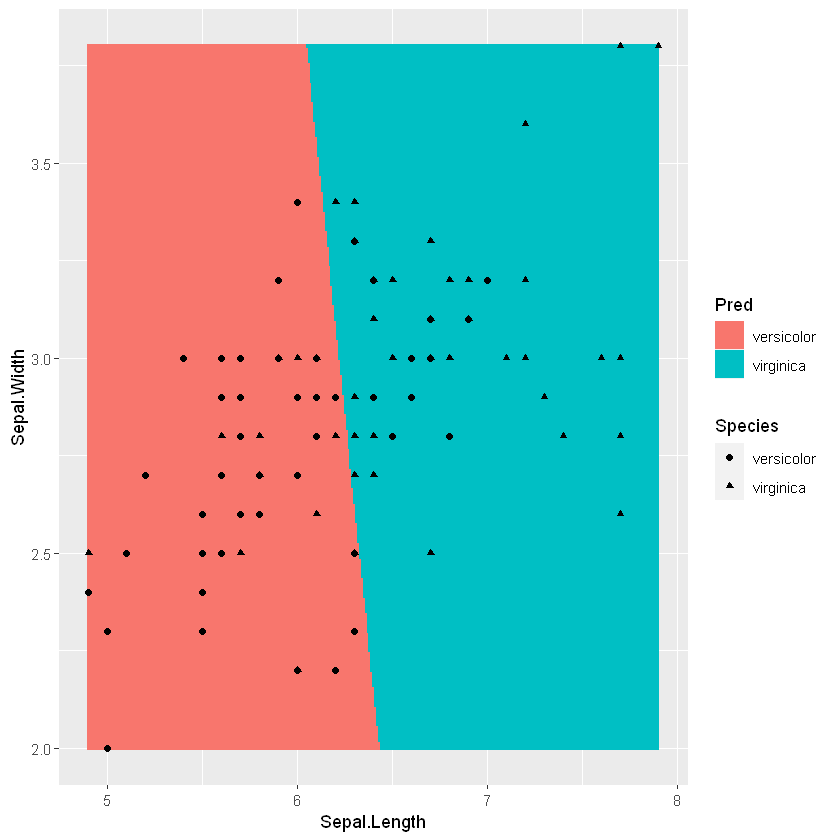

In [39]:
plot_mod(log_mod)+geom_point(data=dset,mapping=aes(x=Sepal.Length,y=Sepal.Width,shape=Species),inherit.aes=FALSE)

In [40]:
library('nnet')

In [41]:
dset2 = iris[,c("Sepal.Length","Sepal.Width","Species")]
table(dset2$Species)


    setosa versicolor  virginica 
        50         50         50 

In [42]:
?multinom

multinom {nnet},R Documentation
formula,"a formula expression as for regression models, of the form response ~ predictors. The response should be a factor or a matrix with K columns, which will be interpreted as counts for each of K classes. A log-linear model is fitted, with coefficients zero for the first class. An offset can be included: it should be a numeric matrix with K columns if the response is either a matrix with K columns or a factor with K >= 2 classes, or a numeric vector for a response factor with 2 levels. See the documentation of formula() for other details."
data,an optional data frame in which to interpret the variables occurring in formula.
weights,optional case weights in fitting.
subset,expression saying which subset of the rows of the data should be used in the fit. All observations are included by default.
na.action,a function to filter missing data.
contrasts,a list of contrasts to be used for some or all of the factors appearing as variables in the model formula.
Hess,logical for whether the Hessian (the observed/expected information matrix) should be returned.
summ,"integer; if non-zero summarize by deleting duplicate rows and adjust weights. Methods 1 and 2 differ in speed (2 uses C); method 3 also combines rows with the same X and different Y, which changes the baseline for the deviance."
censored,"If Y is a matrix with K columns, interpret the entries as one for possible classes, zero for impossible classes, rather than as counts."
model,"logical. If true, the model frame is saved as component model of the returned object."


In [44]:
mod2 = multinom(Species~.,data=dset2)
summary(mod2)
predict(mod2)

# weights:  12 (6 variable)
initial  value 164.791843 
iter  10 value 62.715967
iter  20 value 59.808291
iter  30 value 55.445984
iter  40 value 55.375704
iter  50 value 55.346472
iter  60 value 55.301707
iter  70 value 55.253532
iter  80 value 55.243230
iter  90 value 55.230241
iter 100 value 55.212479
final  value 55.212479 
stopped after 100 iterations


Call:
multinom(formula = Species ~ ., data = dset2)

Coefficients:
           (Intercept) Sepal.Length Sepal.Width
versicolor   -92.09924     40.40326   -40.58755
virginica   -105.10096     42.30094   -40.18799

Std. Errors:
           (Intercept) Sepal.Length Sepal.Width
versicolor    26.27831     9.142717    27.77772
virginica     26.37025     9.131119    27.78875

Residual Deviance: 110.425 
AIC: 122.425 

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     virginica  virginica  virginica  versicolor
 [55] virginica  versicolor virginica  versicolor virginica  versicolor
 [61] versicolor versicolor versicolor versicolor versicolor virginica 
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor virginica  virginica  virginica  virginica 
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor virginica  versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  versicolor
[103] virginica  virginica  virginica  virginica  versicolor virginica 
[109] virginica  virginica  virginica  virginica  virginica  versicolor
[115] versicolor virginica  virginica  virginica  virginica  versicolor
[121] virginica  versicolor virginica  virginica  virginica  virginica 
[127] versicolor versicolor virginica  virginica  virginica  virginica 
[133] virginica  virginica  versicolor virginica  virginica  virginica 
[139] versicolor virginica  virginica  virginica  versicolor virginica 
[145] virginica  virginica  versicolor virginica  virginica  versicolor
Levels: setosa versicolor virginica

In [47]:
predict(mod2,type="probs")

,setosa,versicolor,virginica
1,1.0000000,6.262518e-13,9.134601e-14
2,0.9999999,1.261362e-07,1.030832e-08
3,1.0000000,1.164308e-14,7.051641e-16
4,1.0000000,1.185963e-14,5.708551e-16
5,1.0000000,1.902668e-16,2.389135e-17
6,1.0000000,1.023397e-14,3.094854e-15
7,1.0000000,6.109239e-20,3.315118e-21
8,1.0000000,6.378996e-13,7.394781e-14
9,1.0000000,1.230490e-14,3.741083e-16
10,1.0000000,2.178438e-09,1.852873e-10


In [48]:
apply(predict(mod2,type="probs"),1,which.max)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   3   3   3   2   3   2   3   2   3   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   2   2   2   3   2   2   2   2   2   2   2   2   3   3   3   3   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   2   2   2   2   3   2   2   2   2   2   2   2   2   2   2   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  3   2   3   3   3   3   2   3   3   3   3   3   3   2   2   3   3   3   3   2 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  3   2   3   3   3   3   2   2   3   3   3   3   3   3   2   3   3   3   2   3 
141 142 143 144 145 146 147 148 149 150 
  3   3   2   3   3   3   2   3   3   2

In [51]:
plot_mod = function(mod){
    x1r = range(dset2$Sepal.Length)
    x2r = range(dset2$Sepal.Width)
    x1s = seq(x1r[1],x1r[2],.05)
    x2s = seq(x2r[1],x2r[2],.05)
    grd = expand.grid(x1s,x2s)
    colnames(grd) = c('Sepal.Length','Sepal.Width')
    grd_pred = predict(mod,newdata=grd,type='class')
    grd_df = cbind(grd,grd_pred)
    colnames(grd_df) = c('Sepal.Length','Sepal.Width','Pred')
    ggplot(data=grd_df,mapping=aes(x=Sepal.Length,y=Sepal.Width,fill=Pred))+geom_tile()
}

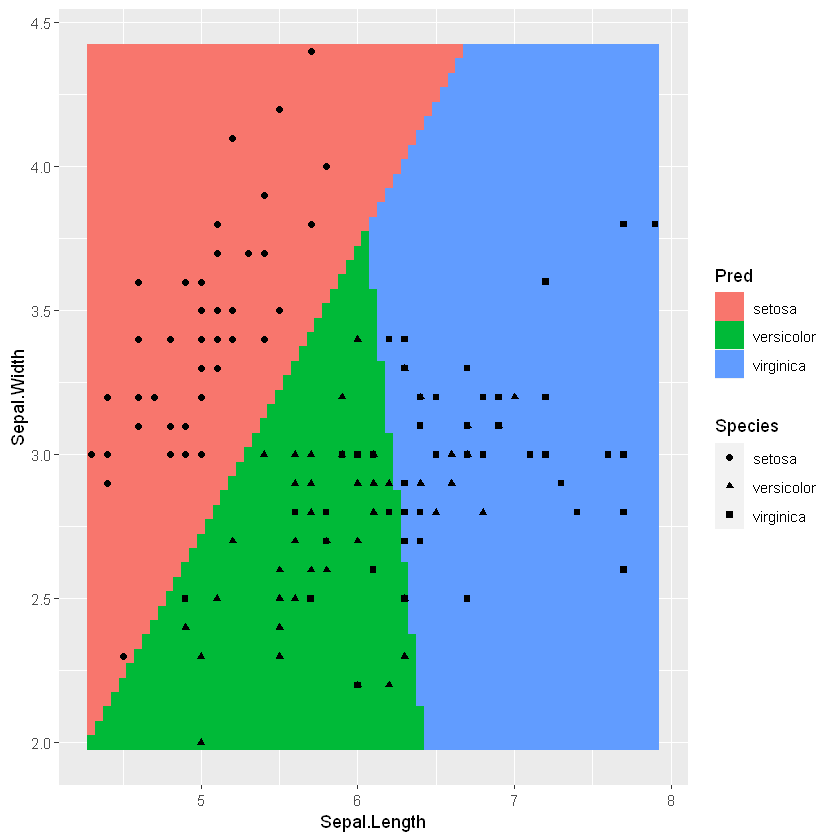

In [52]:
plot_mod(mod2)+geom_point(data=dset2,mapping=aes(x=Sepal.Length,y=Sepal.Width,shape=Species),inherit.aes=FALSE)

# weights:  18 (10 variable)
initial  value 164.791843 
iter  10 value 59.449065
iter  20 value 55.926858
iter  30 value 55.239268
iter  40 value 55.123997
final  value 55.122483 
converged


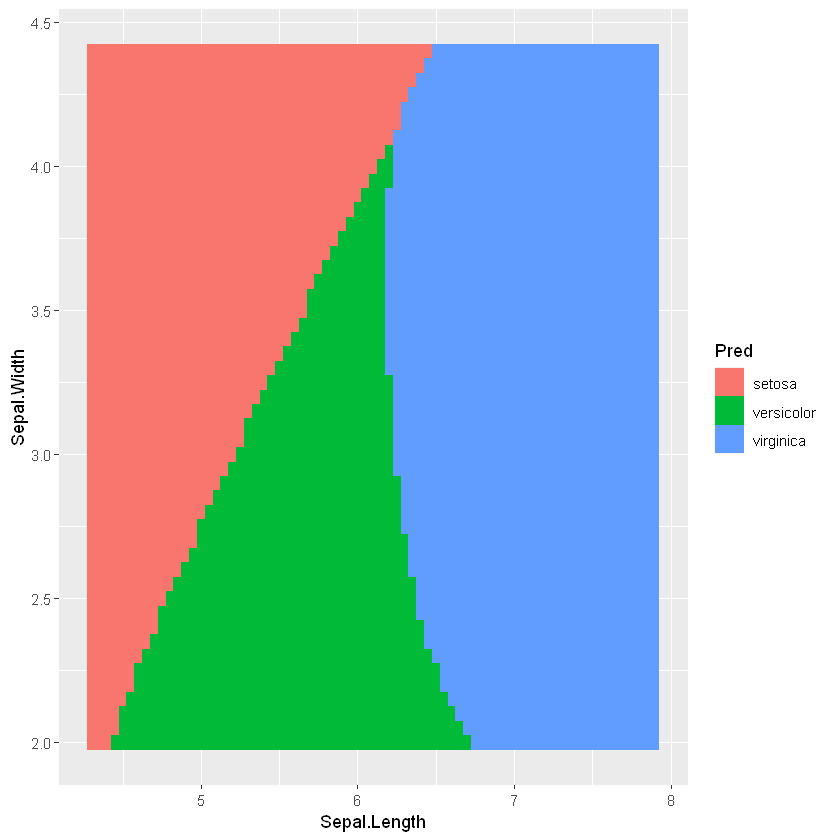

In [54]:
mod3 = multinom(Species~I(Sepal.Width^2)+Sepal.Width*Sepal.Length,data=dset2)
plot_mod(mod3)